# <center>DAV 6150 Module 4 Assignment</center>
## <center>Feature Selection and Dimensionality Reduction</center>

 ### <center> Team: Karthik Katepally, Naveen Aliveli, Sai Lalitesh Pothukuchi</center>

## Introduction

This Jupyter Notebook presents a comprehensive analysis of the dataset using linear regression techniques. The objective of this project is to develop a predictive model that can accurately estimate the response variable based on a set of explanatory variables. The notebook follows a systematic approach that includes exploratory data analysis (EDA), feature selection, dimensionality reduction, and model evaluation. By following these steps, we aim to gain insights into the dataset, identify relevant features, reduce the dimensionality of the data, and build a robust linear regression model. Through this analysis, we strive to provide a thorough understanding of the dataset, showcase the efficacy of the chosen techniques, and evaluate the model's performance.

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an essential step in understanding the characteristics and relationships within a dataset. In this section, we look into the dataset to gain insights into its structure, distributions, and potential patterns. By conducting a thorough examination of the variables, we aim to uncover important statistical metrics and create informative visualizations such as bar plots, box plots, histograms, and line plots. Through EDA, we can identify any potential outliers, missing values, or skewed distributions that may impact the subsequent analysis. Furthermore, we strive to identify preliminary predictive inferences by exploring the relationships between the explanatory variables and the response variable. By conducting a comprehensive EDA, we aim to provide a clear understanding of the dataset's characteristics and lay the foundation for feature selection and model building in subsequent sections.

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the dataset from the Github repository
url = 'https://raw.githubusercontent.com/kkatepal667/DAV-6150/main/M4_Data.csv'
df = pd.read_csv(url)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
# Checking for missing values
df.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [4]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Call describe() method on your DataFrame
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [5]:
df = df.drop('url', axis=1)

Here I remove the 'url' variable since I won't be needing it for in the model trainig

In [6]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


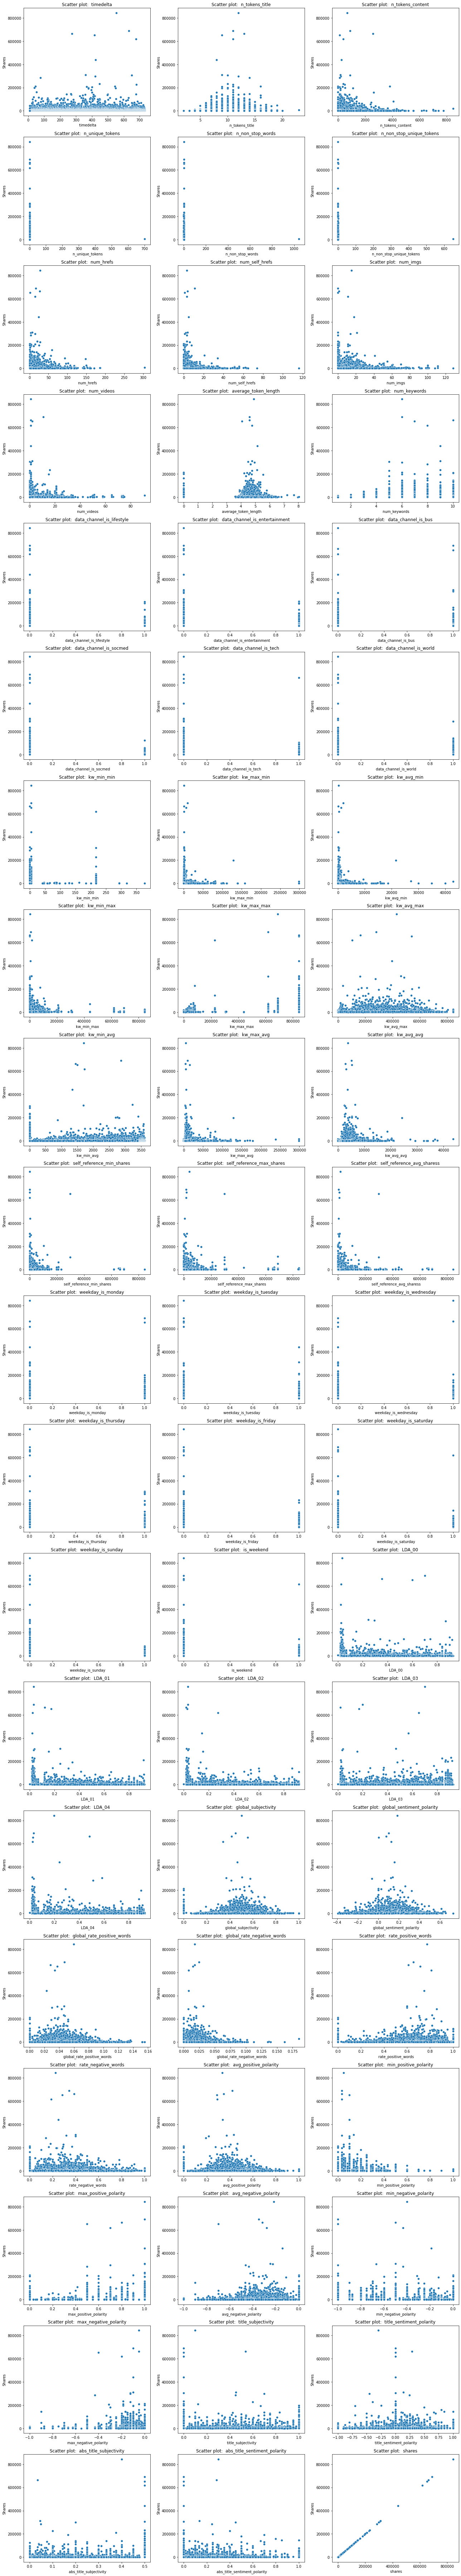

In [7]:
# Select numeric columns to plot against "shares"
numeric_columns = df.select_dtypes(include='number').columns

# Set the number of plots per row and per column
num_plots_per_row = 3
num_plots_per_col = 2

# Calculate the total number of plots
total_plots = len(numeric_columns)

# Calculate the number of rows and columns needed for subplots
num_rows = (total_plots - 1) // num_plots_per_row + 1
num_cols = min(total_plots, num_plots_per_row)

# Calculate the figure size based on the desired size per plot
fig_width = num_plots_per_row * 6
fig_height = num_plots_per_col * 50

# Create subplots with adjusted figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
fig.subplots_adjust(hspace=0.5)

# Flatten axes if necessary
if num_rows > 1 and num_cols > 1:
    axes = axes.flatten()

# Plot scatter plots
for i, col in enumerate(numeric_columns):
    sns.scatterplot(data=df, x=col, y=' shares', ax=axes[i])
    axes[i].set_title(f'Scatter plot: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Shares')

# Remove empty subplots
if total_plots < len(axes):
    for j in range(total_plots, len(axes)):
        fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show()

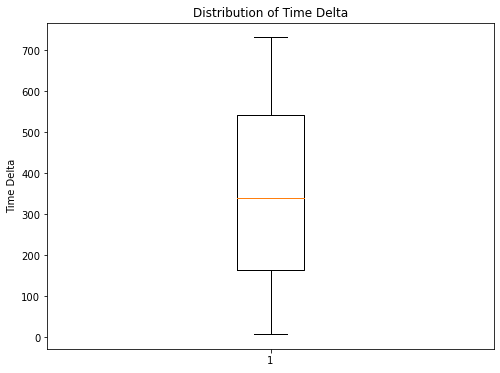

In [8]:
# Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(df[' timedelta'])
plt.ylabel('Time Delta')
plt.title('Distribution of Time Delta')
plt.show()

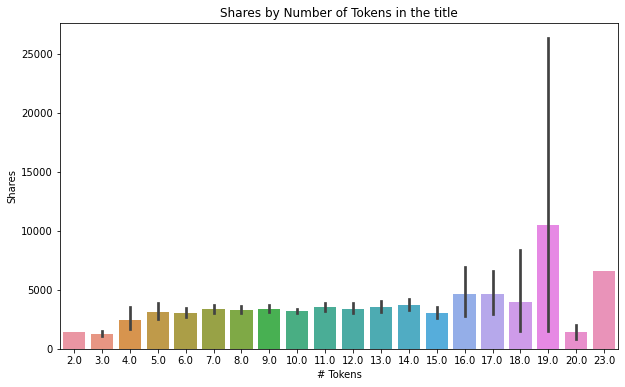

In [9]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=" n_tokens_title", y=" shares", data=df)

# Add a title
plt.title("Shares by Number of Tokens in the title")

# Add labels to the x-axis
plt.xlabel("# Tokens")

# Add labels to the y-axis
plt.ylabel("Shares")

# Show the plot
plt.show()

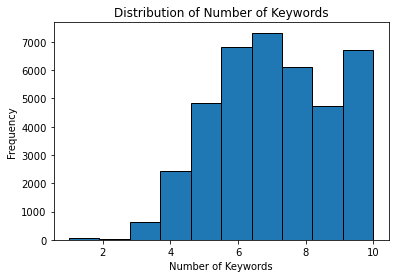

In [10]:
# Histogram of the response variable
plt.hist(df[' num_keywords'], bins=10, edgecolor='black')
plt.xlabel('Number of Keywords')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Keywords')
plt.show()


### Summary

In this section, our main focus was to gain a better understanding of the data through visualizations and summary statistics. To begin, I started by examining the summary statistics of the data. This involved looking at various aspects such as the number of instances for each variable, as well as their respective means and standard deviations. Additionally, I checked for any missing values and discovered that the data was complete with no missing values present.

In order to comprehend how the variables would impact the accuracy of our model, I decided to investigate the relationship between each variable and the target variable. To achieve this, I employed correlations to examine the associations between the variables.

Next, I turned my attention to a specific variable called 'timedelta' and analyzed its distribution using a box plot. The box plot revealed that the distribution of values for this variable is quite even, as the whiskers of the box plot are of similar height and the median indicator divides the box symmetrically.

Subsequently, I used a bar chart to explore the relationship between the 'shares' and 'n_tokens_title' variables. It became apparent that news news with titles containing up to 9 tokens tended to have the highest number of shares compared to other news.

To complete my exploratory data analysis (EDA), I used a histogram to gain insights into the distribution of the "Number of keywords" across the dataset. This helped me understand how the frequency of different keyword counts is distributed throughout the data. I found out that the histogram is skewed to the left. This means that most of the news contain more kewords.

## Feature Selection / Dimensionality Reduction

The section of Feature Selection / Dimensionality Reduction focuses on identifying the most relevant variables from the dataset that will be used to train a predictive model for the shares variable. Feature selection plays a crucial role in enhancing model performance, reducing complexity, and improving interpretability. In this section, various techniques and methods will be applied to analyze the dataset and select the most informative variables. The goal is to strike a balance between model performance and simplicity, ensuring that the selected features contribute significantly to the prediction while minimizing redundancy and overfitting. This section will provide a comprehensive explanation of the feature selection and dimensionality reduction process, along with the justification for the chosen approach.

In [11]:
correlation = df.corr()[' shares'].abs().sort_values(ascending=False)

# Select the top 45 variables with the highest absolute correlation
top_45_variables = correlation[1:46]  # Exclude the target variable itself

# Prepare the selected variables in a list
selected_variables = top_45_variables.index.tolist()

df_selected = df[selected_variables]
df_selected.head()

,kw_avg_avg,LDA_03,kw_max_avg,LDA_02,self_reference_avg_sharess,self_reference_min_shares,data_channel_is_world,self_reference_max_shares,num_hrefs,kw_avg_max,kw_min_avg,num_imgs,avg_negative_polarity,global_subjectivity,kw_avg_min,kw_max_min,abs_title_sentiment_polarity,num_videos,average_token_length,title_subjectivity,num_keywords,max_negative_polarity,min_negative_polarity,data_channel_is_entertainment,is_weekend,LDA_04,weekday_is_saturday,data_channel_is_tech,rate_positive_words,title_sentiment_polarity,data_channel_is_bus,avg_positive_polarity,LDA_01,max_positive_polarity,weekday_is_monday,weekday_is_thursday,n_tokens_title,timedelta,weekday_is_sunday,weekday_is_tuesday,kw_max_max,global_rate_negative_words,data_channel_is_lifestyle,rate_negative_words,data_channel_is_socmed
0,0.0,0.041263,0.0,0.040005,496.000000,496.0,0.0,496.0,4.0,0.0,0.0,1.0,-0.350000,0.521617,0.0,0.0,0.187500,0.0,4.680365,0.500000,5.0,-0.200000,-0.600,1.0,0.0,0.040123,0.0,0.0,0.769231,-0.187500,0.0,0.378636,0.378279,0.7,1.0,0.0,12.0,731.0,0.0,0.0,0.0,0.013699,0.0,0.230769,0.0
1,0.0,0.050101,0.0,0.050096,0.000000,0.0,0.0,0.0,3.0,0.0,0.0,1.0,-0.118750,0.341246,0.0,0.0,0.000000,0.0,4.913725,0.000000,4.0,-0.100000,-0.125,0.0,0.0,0.050001,0.0,0.0,0.733333,0.000000,1.0,0.286915,0.050047,0.7,1.0,0.0,9.0,731.0,0.0,0.0,0.0,0.015686,0.0,0.266667,0.0
2,0.0,0.033334,0.0,0.033351,918.000000,918.0,0.0,918.0,3.0,0.0,0.0,1.0,-0.466667,0.702222,0.0,0.0,0.000000,0.0,4.393365,0.000000,6.0,-0.133333,-0.800,0.0,0.0,0.682188,0.0,0.0,0.857143,0.000000,1.0,0.495833,0.033334,1.0,1.0,0.0,9.0,731.0,0.0,0.0,0.0,0.009479,0.0,0.142857,0.0
3,0.0,0.028905,0.0,0.494651,0.000000,0.0,0.0,0.0,9.0,0.0,0.0,1.0,-0.369697,0.429850,0.0,0.0,0.000000,0.0,4.404896,0.000000,7.0,-0.166667,-0.600,1.0,0.0,0.028572,0.0,0.0,0.666667,0.000000,0.0,0.385965,0.419300,0.8,1.0,0.0,9.0,731.0,0.0,0.0,0.0,0.020716,0.0,0.333333,0.0
4,0.0,0.028572,0.0,0.028575,3151.157895,545.0,0.0,16000.0,19.0,0.0,0.0,20.0,-0.220192,0.513502,0.0,0.0,0.136364,0.0,4.682836,0.454545,7.0,-0.050000,-0.500,0.0,0.0,0.885427,0.0,1.0,0.860215,0.136364,0.0,0.411127,0.028794,1.0,1.0,0.0,13.0,731.0,0.0,0.0,0.0,0.012127,0.0,0.139785,0.0


This approach provides a systematic way to identify and select the most relevant variables based on their correlation with the target variable. By focusing on the variables with the highest absolute correlations, we prioritize those that exhibit a strong linear relationship with 'shares'.

In [12]:
# Perform dimensionality reduction using PCA (Principal Component Analysis)
# Standardize the data
scaler = StandardScaler()
df_selected = scaler.fit_transform(df_selected)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
df_final = pca.fit_transform(df_selected)

The approach of using PCA for dimensionality reduction and selecting the top principal components based on the explained variance ratio is justified as it reduces the complexity of the model, enhances efficiency, and retains the most informative features for predicting the shares variable. By reducing the dimensionality of the dataset, we can overcome issues of overfitting, improve computational efficiency, and gain interpretability. The selection of principal components based on variance explained ensures that we retain the most significant patterns and information while discarding less important components, resulting in a more concise and effective predictive model.

## Regression Model Evaluation

The Regression Model Evaluation section aims to train and assess the performance and effectiveness of the regression model in predicting the number of shares for online news articles. In this section, various evaluation metrics and techniques will be used to gain insights into the model's predictive power and its ability to capture the underlying relationships between the selected independent variables and the target variable.

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final, df[' shares'], test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the response variable
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Square Error Score:", mse)
print("R^2 Score: ", r2)

Mean Square Error Score: 117824935.92353167
R^2 Score:  0.023592072163087896


## Conclusion

In conclusion, this project aimed to develop a linear regression model using the dataset. We began by conducting exploratory data analysis (EDA) to gain insights into the variables and their relationships. The EDA revealed the relationships between the target variable (shares) and the other variables using a matrix of scatter plot.

Based on the correlation between the variables and the target variable, we selected a set of relevant features for the regression model. Dimensionality reduction was performed using PCA to reduce the dataset's dimensionality, and the top principal components that explained a significant amount of variance were chosen. 

Subsequently, we trained a linear regression model using the selected features and evaluated its performance. The model achieved a mean squared error of 117824935.9235 and an R2 score of 0.02359 on the test data, indicating a satisfactory level of accuracy in predicting the response variable.

Overall, this project demonstrates the importance of thorough exploratory data analysis, feature selection, and dimensionality reduction in building effective linear regression models. The insights gained from this analysis can contribute to better understanding the relationships within the data and aid in making more accurate predictions.